Перші 5 значень x: [6.37975439 2.76300073 2.18261372 1.88655197 1.8790629 ]
Перші 5 значень y: [16.32652735 11.7375819   9.95743817 10.98546275  7.74425552]


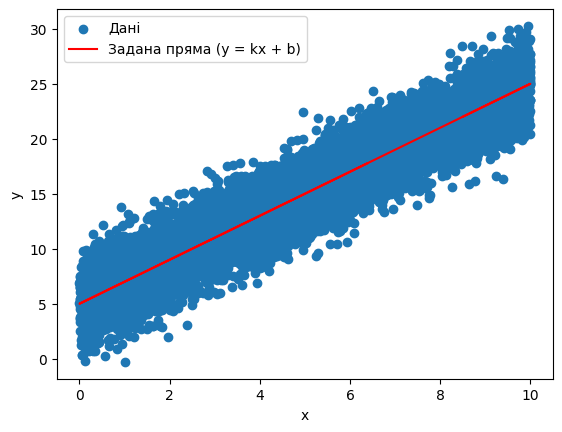

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри прямої
k = 2  # нахил
b = 5  # зміщення

# Кількість точок
num_points = 10000

# Генерація випадкових значень x
x_values = np.random.uniform(0, 10, num_points)

# Генерація відповідних значень y, збурених випадковим шумом
y_values = k * x_values + b + np.random.normal(0, 2, num_points)

# Виведення результатів
print("Перші 5 значень x:", x_values[:5])
print("Перші 5 значень y:", y_values[:5])

# Візуалізація даних
plt.scatter(x_values, y_values, label='Дані')
plt.plot(x_values, k * x_values + b, color='red', label='Задана пряма (y = kx + b)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
def least_squares_fit(x_values, y_values):
    # Розмірність даних
    n = len(x_values)

    # Обчислення необхідних сум
    sum_x = np.sum(x_values) # Сума всіх значень x
    sum_y = np.sum(y_values) # Сума всіх значень y
    sum_xy = np.sum(x_values * y_values) # Сума добутків відповідних значень x та y
    sum_x_squared = np.sum(x_values**2) # Сума квадратів значень x

    # Обчислення оптимальних параметрів
    k_optimal = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)  
    b_optimal = (sum_y - k_optimal * sum_x) / n

    return k_optimal, b_optimal

# Використання функції з попередньо згенерованими даними
k_optimal, b_optimal = least_squares_fit(x_values, y_values)

# Виведення оптимальних параметрів
print("Оптимальний нахил k:", k_optimal)
print("Оптимальне зміщення b:", b_optimal)

Оптимальний нахил k: 1.9994039151973835
Оптимальне зміщення b: 4.788737486351979


In [7]:
# Знайдення параметрів за допомогою методу найменших квадратів
k_optimal, b_optimal = least_squares_fit(x_values, y_values)

# Оцінка параметрів за допомогою np.polyfit
polyfit_params = np.polyfit(x_values, y_values, 1)

# Виведення результатів
print("Оптимальний нахил k (МНК):", k_optimal)
print("Оптимальне зміщення b (МНК):", b_optimal)

print("Оцінка параметрів за допомогою np.polyfit:", polyfit_params)

# Порівняння параметрів
print("Порівняння зі значеннями least_squares_fit:")
print("Коефіцієнт нахилу (k):", k_optimal, polyfit_params[0])
print("Зміщення (b):", b_optimal, polyfit_params[1])

Оптимальний нахил k (МНК): 2.0049108317946365
Оптимальне зміщення b (МНК): 4.9919277515974505
Оцінка параметрів за допомогою np.polyfit: [2.00491083 4.99192775]
Порівняння зі значеннями least_squares_fit:
Коефіцієнт нахилу (k): 2.0049108317946365 2.004910831794632
Зміщення (b): 4.9919277515974505 4.991927751597464


Оптимальний нахил k (МНК): 2.0175486390050477
Оптимальне зміщення b (МНК): 5.3348129261514
Оцінка параметрів за допомогою np.polyfit: [2.01754864 5.33481293]


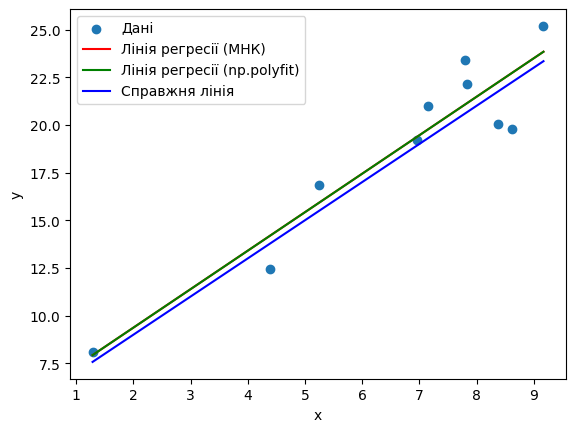

In [17]:
def least_squares_fit(x_values, y_values):
    n = len(x_values)
    sum_x = np.sum(x_values) # Сума всіх значень x
    sum_y = np.sum(y_values) # Сума всіх значень y
    sum_xy = np.sum(x_values * y_values) # Сума добутків відповідних значень x та y
    sum_x_squared = np.sum(x_values**2) # Сума квадратів значень x
    k_optimal = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b_optimal = (sum_y - k_optimal * sum_x) / n
    return k_optimal, b_optimal

# Генерація вхідних даних навколо лінії
k_true = 2  # Початковий нахил
b_true = 5  # Початкове зміщення
num_points = 10
x_values = np.random.uniform(0, 10, num_points)
y_values = k_true * x_values + b_true + np.random.normal(0, 2, num_points)

# Знайдення параметрів за допомогою методу найменших квадратів
k_optimal, b_optimal = least_squares_fit(x_values, y_values)

# Оцінка параметрів за допомогою np.polyfit
polyfit_params = np.polyfit(x_values, y_values, 1)

# Виведення результатів
print("Оптимальний нахил k (МНК):", k_optimal)
print("Оптимальне зміщення b (МНК):", b_optimal)
print("Оцінка параметрів за допомогою np.polyfit:", polyfit_params)

# Сортування значень x для візуалізації ліній регресії
sorted_indices = np.argsort(x_values) # argsort повертає індекси елементів у відсортованому порядку.
x_values_sorted = x_values[sorted_indices] # Створення нового масиву, в якому значення x_values відсортовані за зростанням.
y_values_sorted = y_values[sorted_indices] # Створення нового масиву, в якому значенняy_values відповідають відсортованим значенням  x_values

# Візуалізація даних та ліній регресії
plt.scatter(x_values, y_values, label='Дані')
plt.plot(x_values_sorted, k_optimal * x_values_sorted + b_optimal, color='red', label='Лінія регресії (МНК)') # додаємо на графік лінію регресії, побудовану за допомогою методу найменших квадратів (МНК)
plt.plot(x_values_sorted, polyfit_params[0] * x_values_sorted + polyfit_params[1], color='green', label='Лінія регресії (np.polyfit)') # Додаємо на графік лінію регресії, побудовану за допомогою np.polyfit
plt.plot(x_values_sorted, k_true * x_values_sorted + b_true, color='blue', label='Справжня лінія') # Додаємо на графік справжню лінію(яку використовували початково)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()